## Step 1: Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
# Loading the Dataset 
dataset = pd.read_csv("../datasets/Housing.csv") 
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Shape of the data
dataset.shape 

(545, 13)

In [7]:
# Summary Statistics 
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [8]:
# Confirm NULL Values 
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### A. Univariate Analysis 

- Univariate analysis of the target variable `Price` and the Predictors


Text(0.5, 0, 'House Price (Millions)')

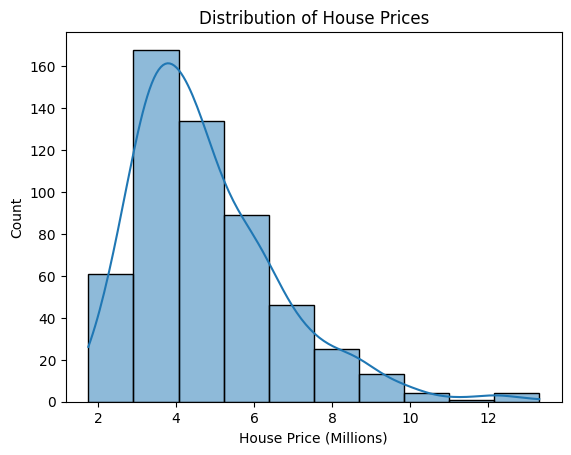

In [12]:
# Checking distribution/normality of the prices 

sns.histplot(data=dataset.price/1000000, bins=10, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("House Price (Millions)")


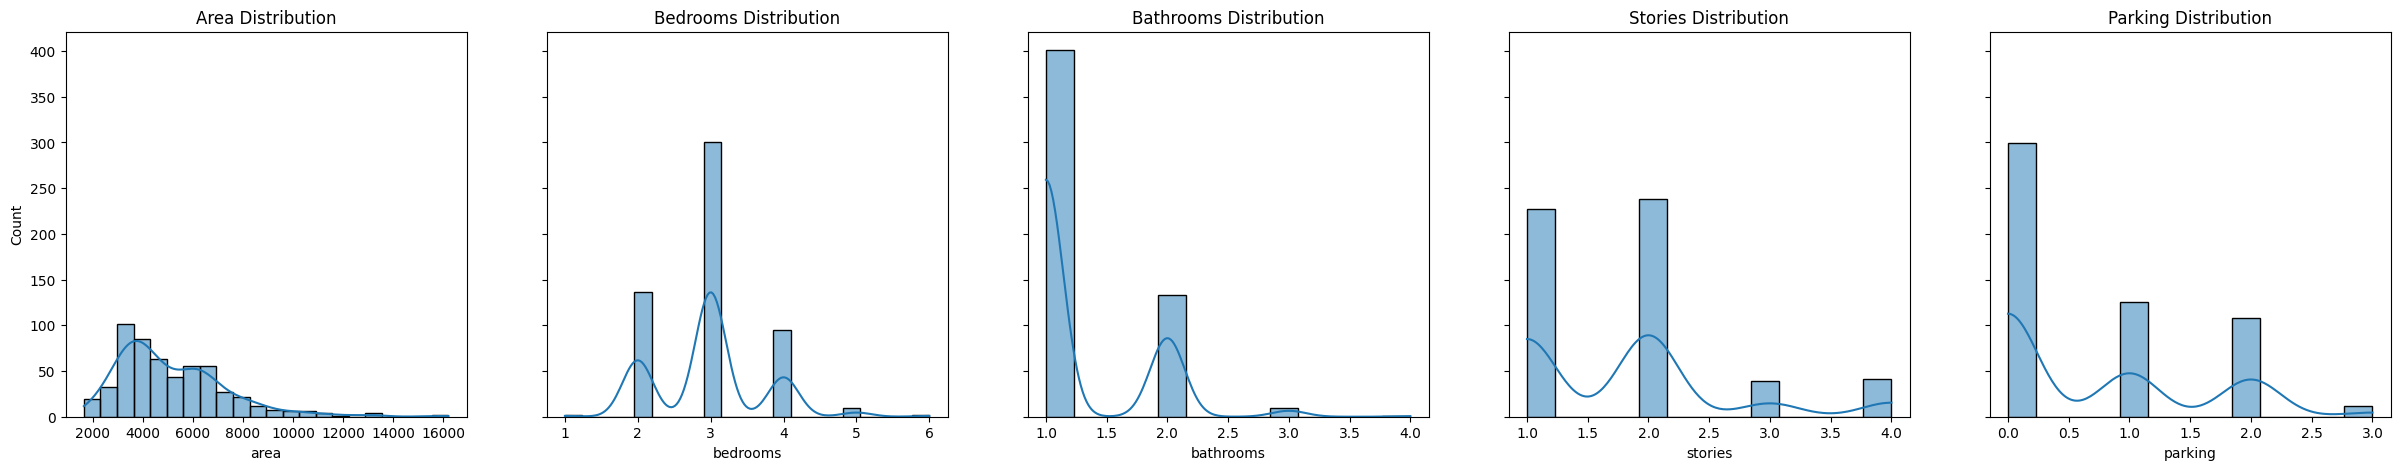

In [30]:
# Coninous Predictors 

# Extract continous predictors
continous_predictors = dataset.select_dtypes(include=["int64"]) 

# Using Histograms to check distribution of continous predictors 
continous_predictors = continous_predictors.drop(columns=["price"]) 

# Extract the cols 
columns = list(continous_predictors.columns) 

# Plot the histograms 
fig, ax = plt.subplots(1, 5, figsize=(30, 5), sharey=True) 
ax = ax.flatten() 

for index, column in enumerate(columns):
    sns.histplot(continous_predictors[column], ax=ax[index], kde=True)
    ax[index].set_title(f"{column.capitalize()} Distribution")
